In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import neural_network
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [52]:
df = pd.read_csv('data/CarPricePrediction/CarPrice_Assignment.csv', encoding='utf-8')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [54]:
df['gas'] = df['fueltype'].apply(lambda x:1 if x == 'gas' else 0).astype('uint8')
df['turbo'] = df['aspiration'].apply(lambda x:1 if x == 'turbo' else 0).astype('uint8')
df['door_4'] = df['doornumber'].apply(lambda x:1 if x == 'four' else 0).astype('uint8')
df['front'] = df['enginelocation'].apply(lambda x: 1 if x == 'front' else 0).astype('uint8')
def cyl2int(x):
    if x == 'two': return 2
    elif x == 'three': return 3
    elif x == 'four': return 4
    elif x == 'five': return 5
    elif x == 'six': return 6
    elif x == 'eight': return 8
    elif x == 'twelve': return 12
df['cylnum'] = df['cylindernumber'].apply(cyl2int)

In [55]:
df = df.drop(['car_ID', 'fueltype','CarName', 'aspiration','doornumber','enginelocation','cylindernumber'], axis=1)

In [56]:
df = pd.get_dummies(data=df, columns=['carbody', 'drivewheel','enginetype', 'fuelsystem'])

In [60]:
df.dtypes

symboling                int64
wheelbase              float64
carlength              float64
carwidth               float64
carheight              float64
curbweight               int64
enginesize               int64
boreratio              float64
stroke                 float64
compressionratio       float64
horsepower               int64
peakrpm                  int64
citympg                  int64
highwaympg               int64
price                  float64
gas                      uint8
turbo                    uint8
door_4                   uint8
front                    uint8
cylnum                   int64
carbody_convertible      uint8
carbody_hardtop          uint8
carbody_hatchback        uint8
carbody_sedan            uint8
carbody_wagon            uint8
drivewheel_4wd           uint8
drivewheel_fwd           uint8
drivewheel_rwd           uint8
enginetype_dohc          uint8
enginetype_dohcv         uint8
enginetype_l             uint8
enginetype_ohc           uint8
enginety

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   wheelbase            205 non-null    float64
 2   carlength            205 non-null    float64
 3   carwidth             205 non-null    float64
 4   carheight            205 non-null    float64
 5   curbweight           205 non-null    int64  
 6   enginesize           205 non-null    int64  
 7   boreratio            205 non-null    float64
 8   stroke               205 non-null    float64
 9   compressionratio     205 non-null    float64
 10  horsepower           205 non-null    int64  
 11  peakrpm              205 non-null    int64  
 12  citympg              205 non-null    int64  
 13  highwaympg           205 non-null    int64  
 14  price                205 non-null    float64
 15  gas                  205 non-null    int

In [43]:
df.isna().sum()

symboling              0
wheelbase              0
carlength              0
carwidth               0
carheight              0
curbweight             0
enginesize             0
boreratio              0
stroke                 0
compressionratio       0
horsepower             0
peakrpm                0
citympg                0
highwaympg             0
price                  0
gas                    0
turbo                  0
door_4                 0
front                  0
cylnum                 0
carbody_convertible    0
carbody_hardtop        0
carbody_hatchback      0
carbody_sedan          0
carbody_wagon          0
drivewheel_4wd         0
drivewheel_fwd         0
drivewheel_rwd         0
enginetype_dohc        0
enginetype_dohcv       0
enginetype_l           0
enginetype_ohc         0
enginetype_ohcf        0
enginetype_ohcv        0
enginetype_rotor       0
fuelsystem_1bbl        0
fuelsystem_2bbl        0
fuelsystem_4bbl        0
fuelsystem_idi         0
fuelsystem_mfi         0


In [61]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(164, 42)
(41, 42)


In [62]:
models = [linear_model.LinearRegression(),
          neighbors.KNeighborsRegressor(),
          svm.SVR(),
          neural_network.MLPRegressor(),
          tree.DecisionTreeRegressor(max_depth=3),
          ensemble.RandomForestRegressor(max_depth=3),
          ensemble.GradientBoostingRegressor(n_estimators=100)]

In [63]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.931942,1529.621998,4.549283e+06,2132.904805,0.827263,2399.857904,8.649867e+06,2941.065582
1,KNeighborsRegressor,0.891543,1642.275205,7.249738e+06,2692.533659,0.789363,2141.842273,1.054771e+07,3247.724466
2,SVR,-0.108609,5637.755137,7.410434e+07,8608.387610,-0.109706,4927.772254,5.556887e+07,7454.452946
3,MLPRegressor,0.185016,5370.161062,5.447712e+07,7380.861541,0.159946,5101.436354,4.206598e+07,6485.829025
4,DecisionTreeRegressor,0.931077,1606.679444,4.607119e+06,2146.419990,0.856297,2016.478997,7.195959e+06,2682.528430
5,RandomForestRegressor,0.950063,1352.852583,3.338041e+06,1827.030560,0.838355,2099.345910,8.094428e+06,2845.070846
6,GradientBoostingRegressor,0.994808,454.935020,3.470864e+05,589.140405,0.902042,1480.869622,4.905261e+06,2214.782278


In [65]:
X_train.dtypes[0]

dtype('int64')

In [49]:
X_train.columns[:14]

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [70]:
from sklearn.preprocessing import StandardScaler

scaling_columns = [x for x in X_train.dtypes.index if X_train.dtypes[x] != 'uint8']
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [72]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.931942,1529.621998,4.549283e+06,2132.904805,0.827263,2399.857904,8.649867e+06,2941.065582
1,KNeighborsRegressor,0.883046,1720.477034,7.817736e+06,2796.021373,0.802933,2117.619512,9.868206e+06,3141.370146
2,SVR,-0.105855,5623.986053,7.392025e+07,8597.688802,-0.106466,4916.607358,5.540665e+07,7443.564221
3,MLPRegressor,-2.638631,13298.936779,2.432222e+08,15595.582739,-3.341189,12947.898670,2.173865e+08,14744.031657
4,DecisionTreeRegressor,0.931077,1606.679444,4.607119e+06,2146.419990,0.856297,2016.478997,7.195959e+06,2682.528430
5,RandomForestRegressor,0.949557,1340.309672,3.371826e+06,1836.253191,0.844364,2046.409427,7.793516e+06,2791.687009
6,GradientBoostingRegressor,0.994808,454.935020,3.470864e+05,589.140405,0.900844,1481.639260,4.965247e+06,2228.283340


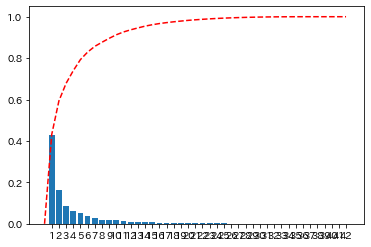

In [73]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [74]:
n = 7
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

In [75]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train_pca,y_train)
    y_pred = model.predict(X_train_pca)
    dic['決定係数(訓練)'] = metrics.r2_score(y_train, y_pred)
    dic['平均絶対誤差(訓練)'] = metrics.mean_absolute_error(y_train, y_pred)
    dic['平均二乗誤差(訓練)'] = metrics.mean_squared_error(y_train, y_pred)
    dic['二乗平均平方根誤差(訓練)'] = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    y_pred = model.predict(X_test_pca)
    dic['決定係数(テスト)'] = metrics.r2_score(y_test, y_pred)
    dic['平均絶対誤差(テスト)'] = metrics.mean_absolute_error(y_test, y_pred)
    dic['平均二乗誤差(テスト)'] = metrics.mean_squared_error(y_test, y_pred)
    dic['二乗平均平方根誤差(テスト)'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,モデル名,決定係数(訓練),平均絶対誤差(訓練),平均二乗誤差(訓練),二乗平均平方根誤差(訓練),決定係数(テスト),平均絶対誤差(テスト),平均二乗誤差(テスト),二乗平均平方根誤差(テスト)
0,LinearRegression,0.831883,2223.321613,1.123769e+07,3352.267125,0.759550,2556.363929,1.204060e+07,3469.956776
1,KNeighborsRegressor,0.864844,1844.377238,9.034393e+06,3005.726744,0.774968,2294.947156,1.126853e+07,3356.862704
2,SVR,-0.105487,5621.435608,7.389566e+07,8596.258241,-0.105973,4914.339691,5.538195e+07,7441.904806
3,MLPRegressor,-2.657519,13331.080625,2.444847e+08,15636.007646,-3.363253,12979.809853,2.184913e+08,14781.451448
4,DecisionTreeRegressor,0.916651,1721.091466,5.571392e+06,2360.379620,0.805599,2380.230801,9.734687e+06,3120.045958
5,RandomForestRegressor,0.942877,1464.926309,3.818366e+06,1954.064084,0.818391,2164.802686,9.094146e+06,3015.650190
6,GradientBoostingRegressor,0.994347,474.553019,3.778806e+05,614.719935,0.876304,1714.037284,6.194103e+06,2488.795418
